In [31]:
import numpy as np                      
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [32]:
data = pd.read_csv("datasets/diabetes.csv")

In [33]:
data.shape

(768, 9)

In [34]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [36]:
data.isnull().sum().sum()

0

In [37]:
data.duplicated().sum()

0

In [38]:
data.value_counts().sum()

768

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [41]:
correlation = data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

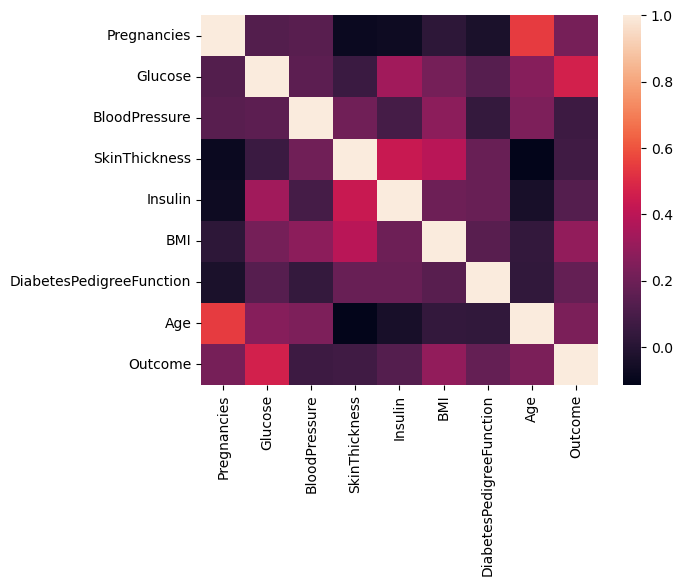

In [42]:
sns.heatmap(correlation)

<Axes: >

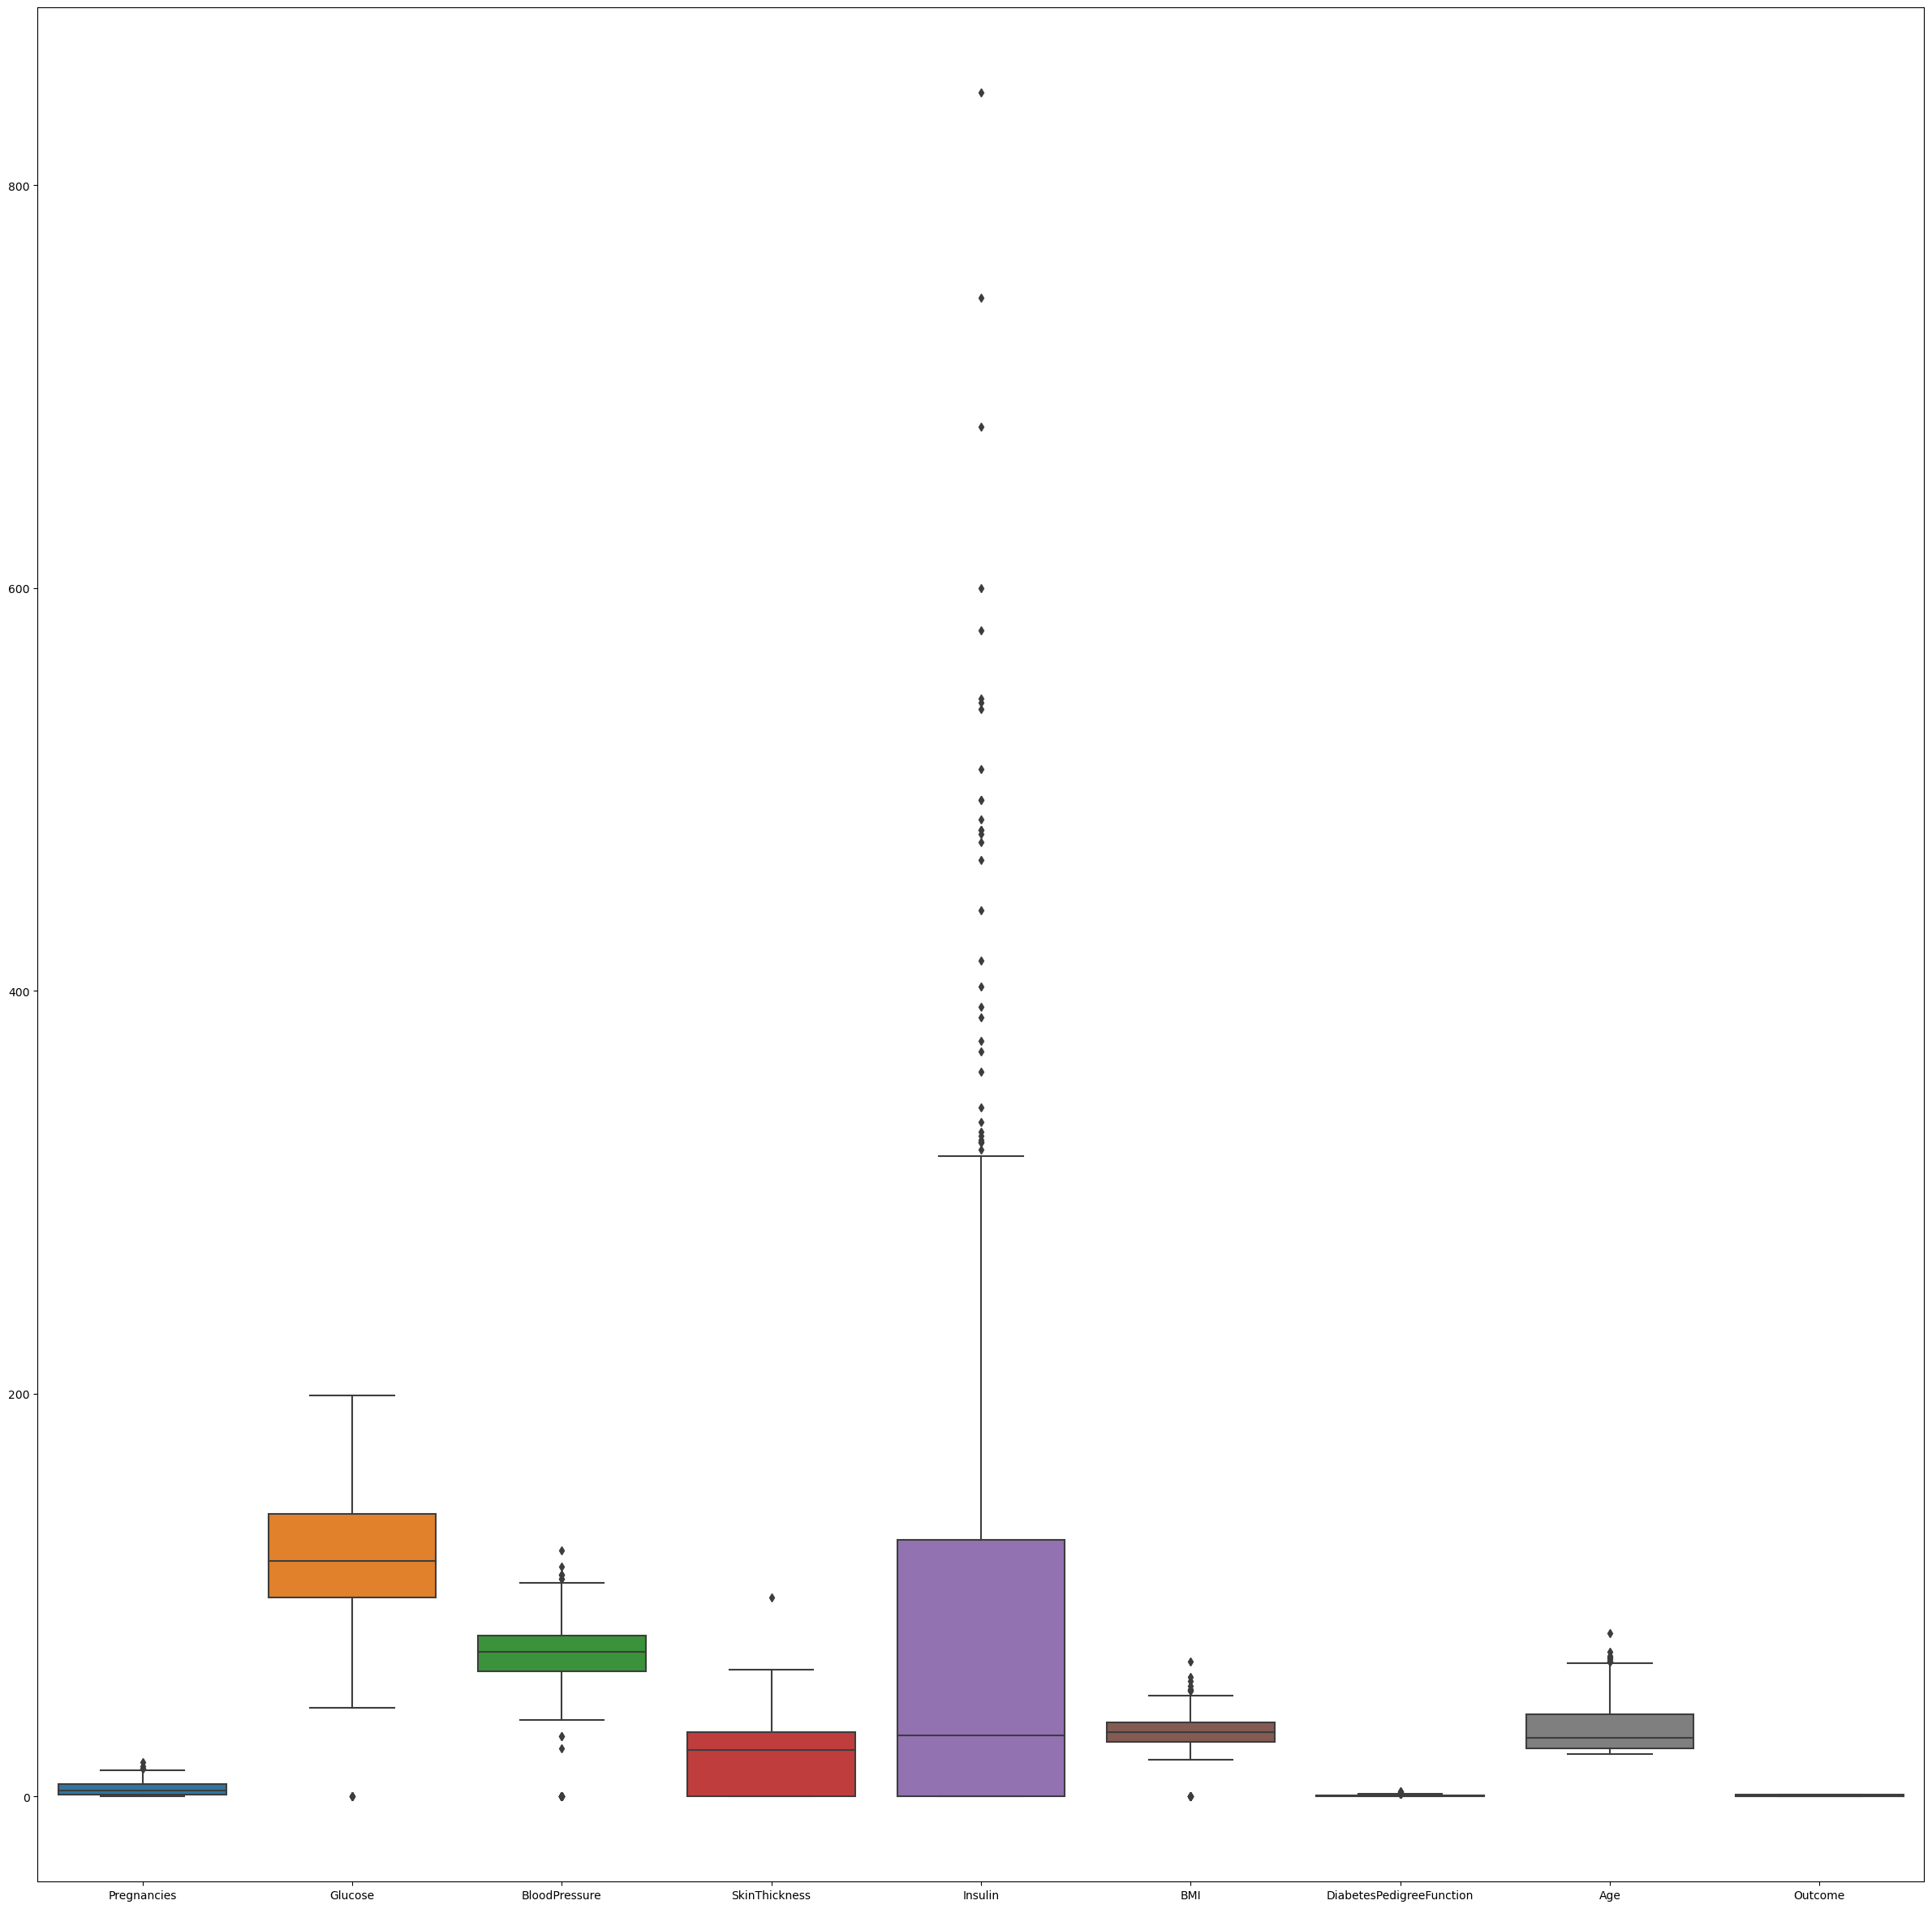

In [43]:
f=plt.figure()
f.set_figwidth(30)
f.set_figheight(30)
sns.boxplot(data)

In [44]:
X=data.iloc[:,:8]

In [45]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [46]:
Y=data['Outcome']

In [47]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [49]:
print("x train length : ",len(x_train))
print("x test length : ",len(x_test))
print("y train length : ",len(y_train))
print("y test length : ",len(y_test))

x train length :  614
x test length :  154
y train length :  614
y test length :  154


In [50]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
prediction1 = model1.predict(x_test)
prediction1[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix
confusionmat1=confusion_matrix(y_test,prediction1)
print(confusionmat1)

[[70 29]
 [23 32]]


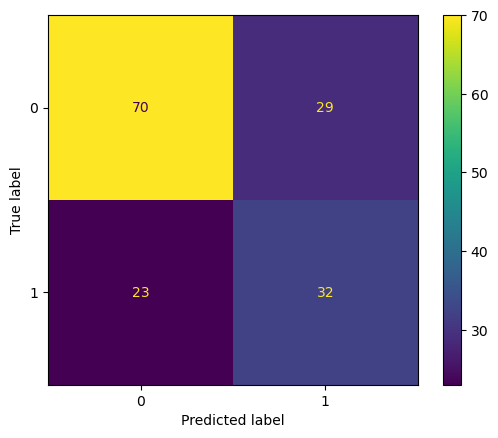

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
vm=ConfusionMatrixDisplay(confusion_matrix=confusionmat1,display_labels=model1.classes_)
vm.plot()
plt.show()

In [56]:
from sklearn.metrics import f1_score,zero_one_loss,precision_score,recall_score
print("f1_score = ",f1_score(y_true=y_test,y_pred=prediction1,average="micro"))
print("zero_one_loss = ",zero_one_loss(y_test,prediction1))
print("precision_score = ",precision_score(y_true=y_test,y_pred=prediction1,average="micro"))
print("recall_score = ",recall_score(y_true=y_test,y_pred=prediction1,average="micro"))

f1_score =  0.6623376623376623
zero_one_loss =  0.33766233766233766
precision_score =  0.6623376623376623
recall_score =  0.6623376623376623


In [57]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
model

DecisionTreeClassifier()

In [58]:
prediction = model.predict(x_test)
prediction[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [59]:
confusionmat=confusion_matrix(y_test,prediction)
print(confusionmat)

[[78 21]
 [16 39]]


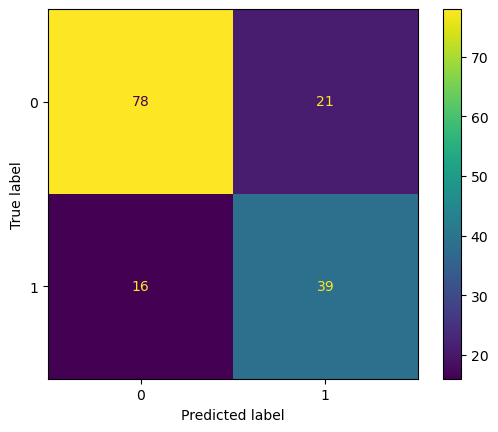

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
vm=ConfusionMatrixDisplay(confusion_matrix=confusionmat,display_labels=model.classes_)
vm.plot()
plt.show()

In [61]:
from sklearn.metrics import f1_score,zero_one_loss,precision_score,recall_score
print("f1_score = ",f1_score(y_true=y_test,y_pred=prediction,average="micro"))
print("zero_one_loss = ",zero_one_loss(y_test,prediction))
print("precision_score = ",precision_score(y_true=y_test,y_pred=prediction,average="micro"))
print("recall_score = ",recall_score(y_true=y_test,y_pred=prediction,average="micro"))

f1_score =  0.7597402597402597
zero_one_loss =  0.24025974025974028
precision_score =  0.7597402597402597
recall_score =  0.7597402597402597


In [62]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
prediction3 = model3.predict(x_test)
prediction3[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [64]:
confusionmat3=confusion_matrix(y_test,prediction3)
print(confusionmat3)

[[80 19]
 [20 35]]


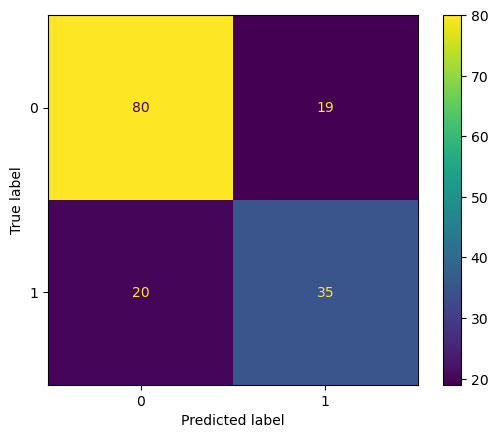

In [65]:
vm=ConfusionMatrixDisplay(confusion_matrix=confusionmat3,display_labels=model3.classes_)
vm.plot()
plt.show()

In [66]:

print("f1_score = ",f1_score(y_true=y_test,y_pred=prediction3,average="micro"))
print("zero_one_loss = ",zero_one_loss(y_test,prediction3))
print("precision_score = ",precision_score(y_true=y_test,y_pred=prediction3,average="micro"))
print("recall_score = ",recall_score(y_true=y_test,y_pred=prediction3,average="micro"))

f1_score =  0.7467532467532466
zero_one_loss =  0.2532467532467533
precision_score =  0.7467532467532467
recall_score =  0.7467532467532467


In [76]:
from joblib import dump, load
# Save the model
dump(model3, 'diabetes.pkl')

# Load the model
loaded_model3 = load('diabetes.pkl')

# Example prediction (modify according to your actual use case)
prediction3 = loaded_model3.predict(X[:10])
print(prediction3)
pred = loaded_model3.predict(X)
pred

[1 0 1 0 1 0 1 1 1 1]


array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,

In [68]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [77]:
z=X[:5]
z

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [79]:
from joblib import dump, load
# Save the model
dump(model, 'diabetes1.pkl')

# Load the model
loaded_model = load('diabetes1.pkl')

# Example prediction (modify according to your actual use case)
prediction = loaded_model.predict(X[:10])
print(prediction)
pred = loaded_model.predict(X)
pred

[1 0 1 0 1 0 1 0 1 1]


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,

In [81]:
Y[:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64